<a href="https://colab.research.google.com/github/Subin-pds/Hotel-booking-Analysis/blob/main/Hotel_Booking_Analysis_(Subin)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# Importing modules of Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date


In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Immporting the csv file frome the drive
filepath = '/content/drive/MyDrive/Copy of Hotel Bookings.csv'
df = pd.read_csv(filepath)

# Introduction


Lodging facilities for travellers dated back from time to time. Hotels became an integral part of human civilisations from then on. People accross the globe access hotel facilities during travel and for leisure trips. 

Here we are! , going to look through the perspectives of the hotel. We are here to inspect our *most valuable assets*; ***the data***. Yes, we are going to detect analyse and conclude our findings that can transform the business and the perspectives about the hotel bookings.

# Data
We are having data of hotel bookings for the year 2015,2016 and 2017 in the City hotel and Resort hotel. The dataset contains informations like arrival date, number of adult, children, parking needed etc. It gives almost all information regarding the hotel bookig apart form the personal information of the customers.

# Inspecting the **data**
We need to inspect the data to get the nature of how the data is tabulated and also get the relationship between the different parameters that are collected.


In [5]:
#inspecting the shape
df.shape

(119390, 32)

In [ ]:
# Inspecting the top
df.head(10)

In [ ]:
# Inspecting the bottom
df.tail()

In [ ]:
# Checking the columns
df.columns

In [ ]:
#checking for more insights
df.describe()

In [ ]:
#inspecting the null values
df.info()

In [ ]:
#inspecting the null values
df.isnull().sum()

# **Data Cleaning**
The first and foremost thing before exploring the data is  to refine out the worthfull data from the crude data. Just like various commercial products being distilled out of the raw crude, we need to extract valuabe composites from our given data.


*  We want to first find the columns having null values and replace them with the
necessary substitutes.
*  We can see the column 'is_canceled' and 'is_repeated_guests' columns are having values as '0' and '1' which will be probably 'True' or 'False' values ie. '0' for ''False' and '1' for 'True'.


*  
We have date split into three columns ('arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'). So its good to concatinate those three column value to a single date and remove those columns.














In [12]:
#Filling the null values of "children" column to "0".
df['children'].fillna(0, inplace = True)

In [13]:
# Filling the null values of "agent" column to "0"
df['agent'].fillna(0,inplace=True)

In [14]:
# company has high number of null values, thus it won't give us relevent insights. We can drop the column.
df=df.drop(['company'],axis=1)

In [15]:
# The country has very few number of null values we can either assign a particular value to those or we can drop that rows which contains null values. 
# Comparing to the size of the dataset it is of no impact if we drop 488 rows. So dropping those rows which contained null values.
df=df.dropna(axis=0)

In [ ]:
df.isnull().sum()

In [17]:
#Converting the boolean values to yes/no
def convert_boolean_to_string(value):
  if value==0:
    value='No'
  elif value==1:
    value='Yes'
  return value

df['is_canceled']=df.apply(lambda x : convert_boolean_to_string(x['is_canceled']),axis=1)

df['is_repeated_guest']=df.apply(lambda x : convert_boolean_to_string(x['is_repeated_guest']),axis=1)


In [18]:
#Funtion for joining the columns containing dates
def join(day,month,year):
  if day <=9:
    day = '0' +str(day)
  day=str(day)
  date = day +'/' + month[:3] + '/' + year
  return date
  
#Creating a new column for date by concatinating the different columns containing the date
df['date_of_arrival'] = df.apply(lambda x : join(x['arrival_date_day_of_month'],x['arrival_date_month'],str(x['arrival_date_year'])),axis=1)

## **Question 1:**
Which is the busiest month for hotel with highest number of checkins?


Text(0, 0.5, 'Arrival Month')

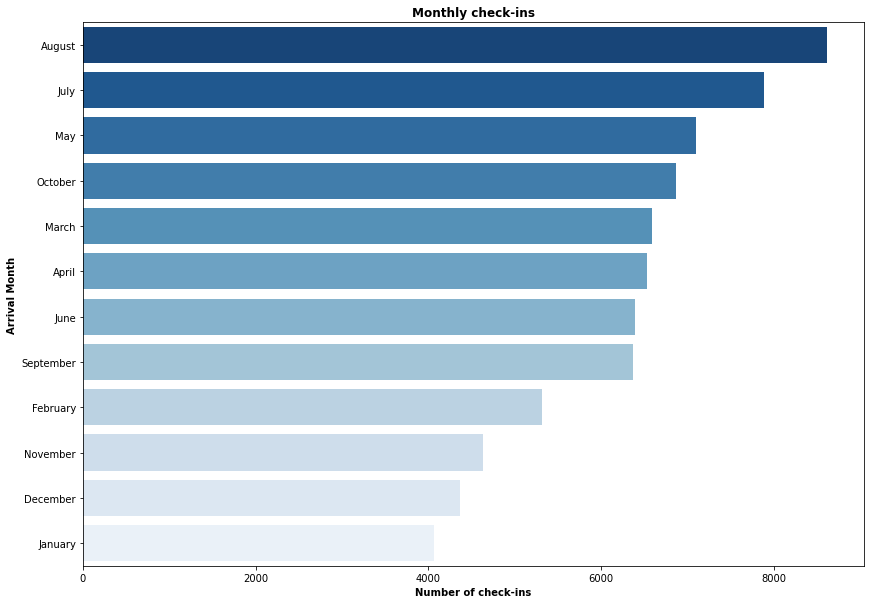

In [35]:
# In our data we have the records of bookings. The bookings are either canceled or not canceled.
# Thus inorder to find the number of check-ins in the hotel we can use the uncanceled bookings.
# We divide the dataset into two datasets of  Canceled_bookings and Uncanceled_bookings.

Uncanceled_bookings = df[df['is_canceled']=='No']
canceled_bookings = df[df['is_canceled']=='Yes']

# Plotting the total checkins in different months for three years for both resort and city hotel.

plt.figure(figsize = (14,10))
sns.countplot(y = 'arrival_date_month', data = Uncanceled_bookings, order = Uncanceled_bookings['arrival_date_month'].value_counts().index , palette='Blues_r')
plt.title('Monthly check-ins', weight='bold')
plt.xlabel('Number of check-ins',weight='bold')
plt.ylabel('Arrival Month',weight='bold')

**Findings**



1.   We can see that the month of **August** is having higher number of bookings followed July and May.
2.   The least bookings are in the months of **January**, December and November. This may be due to the extreme winter so that people donot prefer to move out.

Text(0, 0.5, 'Number of Bookings')

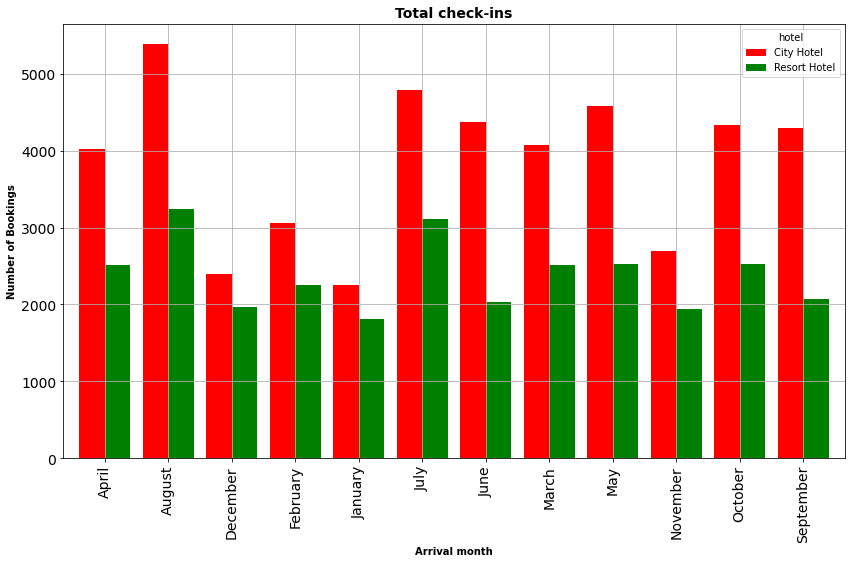

In [41]:
# Plotting the Total number of bookings in City Hotel and Resort Hotel in different months.

monthly_bookigs = Uncanceled_bookings.groupby(['arrival_date_month','hotel'])['is_canceled'].count().unstack()
x=monthly_bookigs.plot.bar(figsize = (14,8) , fontsize = 14,color=['Red','Green'], width=.8)
x.grid()
x.set_title("Total check-ins",fontsize =14, weight='bold')
x.set_xlabel('Arrival month',weight='bold')
x.set_ylabel('Number of Bookings',weight='bold')

# Findings: 

*    In every month of a year the City hotels are always having higher number of bookings compared to the resort hotel.
*   The month of August has higher number of bookings which is greater than 5000 which is then followed by July and May. 


*   The least check-ins for City and Resort hotels are in the month of January.







Text(0, 0.5, 'Number of bookings')

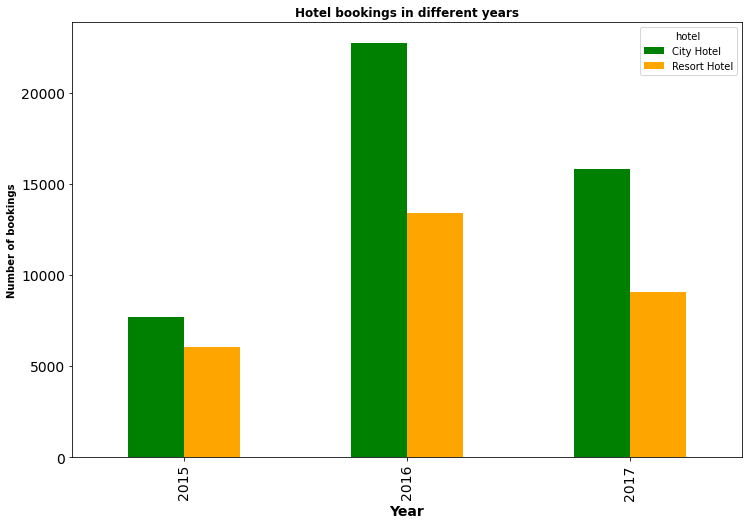

In [54]:
# Plotting the yearly Check-in distribution
yearly_data = Uncanceled_bookings.groupby('arrival_date_year')['hotel'].value_counts().unstack()
yearly_plot = yearly_data.plot.bar(figsize = (12,8),fontsize = 14,color = ['Green','Orange'])
yearly_plot.set_title('Hotel bookings in different years',weight = 'bold')
yearly_plot.set_xlabel('Year',fontsize =14, weight = 'bold')
yearly_plot.set_ylabel('Number of bookings', weight = 'bold')


# Findings:


*   The number of bookings increased from the year 2015 to 2017
*   The bookins in both City hotels and Resort Hotel peak in the year 2016.





# Conclusion:
The Busiest month of Hotel Check-ins is the Month of **August** and the least is in the month of **January**.

# Question 2:
Which nationalities are the most revenue generating customers? 

In [ ]:
#
citizens_booked = Uncanceled_bookings.groupby(['country','hotel'])['is_canceled'].count().unstack()
citizens_booked


In [60]:
citizens_booked = Uncanceled_bookings['country'].value_counts()

Text(0, 0.5, 'Number of bookings')

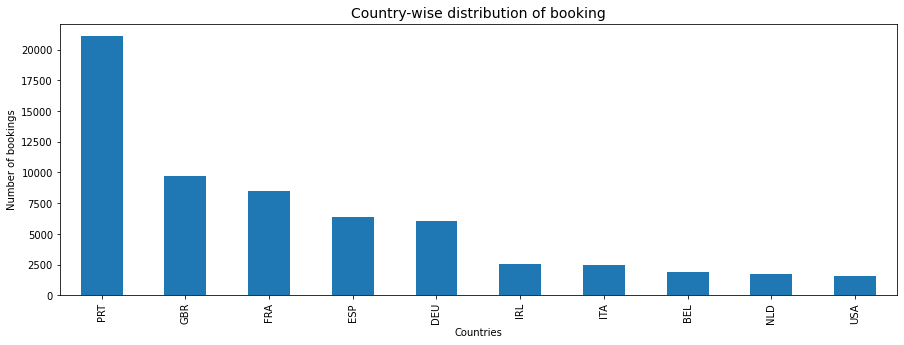

In [78]:
citizen_plot = citizens_booked.head(10).plot.bar(figsize=(15,5))
citizen_plot.set_title('Country-wise distribution of booking',fontsize=14)
citizen_plot.set_xlabel('Countries')
citizen_plot.set_ylabel('Number of bookings')


# Conclusion:
We can see that the people of portugal (PRT) are the highest number of customers for the hotel. In the second position we have United Kindom (GBR) and at the third we have France(FRA). Thus portugal countribute for the maximum number of customers for the past 3 years of hotel bookings.

# Question 3:
Which type of customers have highest lead time and finally cancels making huge loss for the hotel?

In [43]:
# Finding the average lead time for different types of customers in the Cancelled booking dataset.
customer_avg_leadtime = canceled_bookings.groupby('customer_type')['lead_time'].mean()

Text(0, 0.5, 'Average lead time')

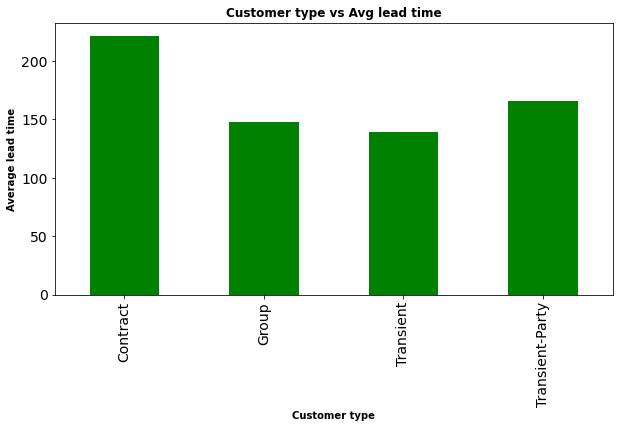

In [115]:
# Plotting the Customer type vs average lead time for the Canceled bookings.
customer_avg_leadtime.plot.bar(figsize = (10,5) , fontsize = 14, color = 'Green')
plt.title('Customer type vs Avg lead time', weight='bold')
plt.xlabel('Customer type',weight='bold')
plt.ylabel('Average lead time',weight='bold')

# Conclusion:



*    We can see that ***contract type customers*** are having highest leadtime and finally cancels. Thus the hotel can ask for advanced amount for people of this category to minimize loss and to increse the chance of check-ins

# Question 4 :
which type of custumers are more prone to cancellations?

In [118]:
# Counting the total number of customers canceled in each category of customer type.

canceled_bookings.groupby('customer_type')['hotel'].count()

customer_type
Contract            1262
Group                 58
Transient          36460
Transient-Party     6377
Name: hotel, dtype: int64

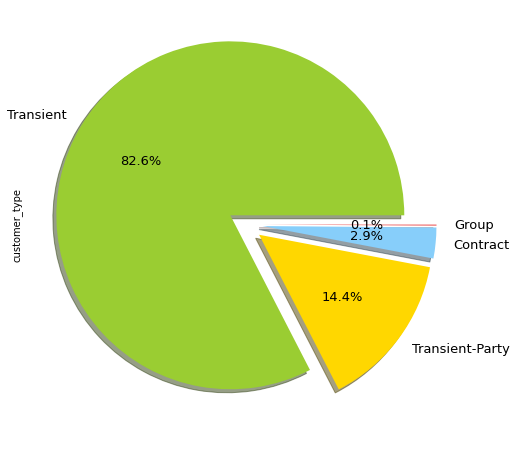

In [119]:
# Plotting the pie diagram
c=canceled_bookings['customer_type'].value_counts()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)
c.plot.pie( fontsize = 13, colors=colors, explode=explode,autopct='%1.1f%%', shadow=True, figsize=(8,8))


# Conclusion :
*   Thus we can see that Transient type customers are more prone to cancellations accounting for 82.6 % of the total number of booking cancellations.nThus it is better to arrange better management systems within the hotels to handle such type of customers to reduce the losses due to hotel cancellations.


# Question 5:
which is the time when people can book hotels at cheap price?

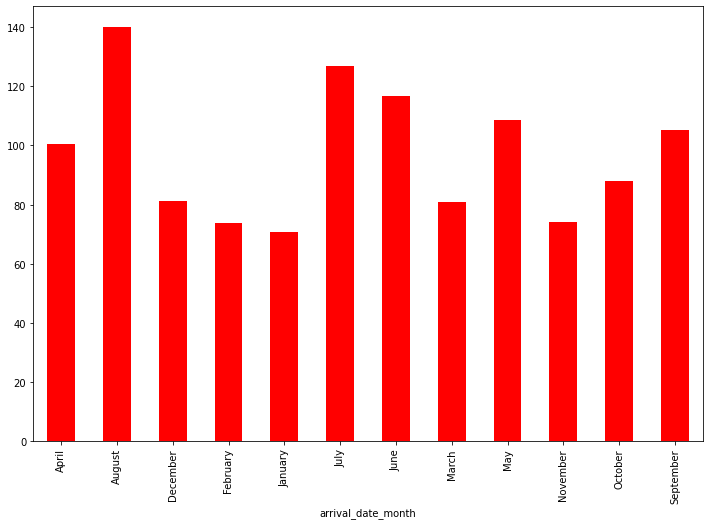

In [127]:
# Calculating the monthly average rent rate (adr)
monthy_avg_rent_rate = df.groupby('arrival_date_month')['adr'].mean()

# plotting the Average monthly rates 
monthy_avg_rent_rate.plot.bar(figsize=(12,8), color='Red')


# Conclusion :
January is the month having very low cost of booking since there are fewer number of bookings in this month.